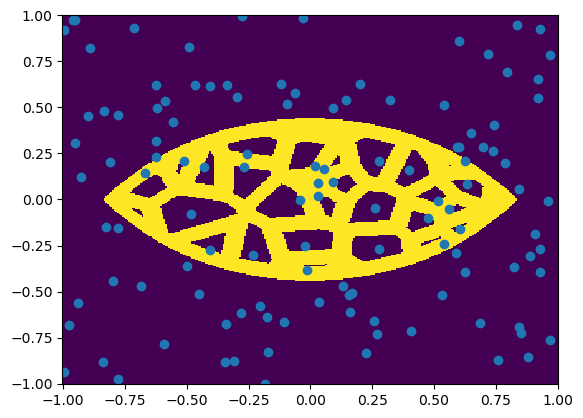

In [209]:
import numpy as np
import jax.numpy as jnp
from jax import vmap, lax
import matplotlib.pyplot as plt

np.random.seed(5)
px = np.random.uniform(-1, 1, 120)
py = np.random.uniform(-1, 1, 120)

dist = lambda x,y: np.argmin((x-px)**2 + (y-py)**2)

X, Y = np.meshgrid(np.linspace(-1, 1, 300), np.linspace(-1, 1, 300))
F = vmap(vmap(dist))(X, Y) * (X**2 + (Y+0.6)**2 < 1) * (X**2 + (Y-0.6)**2 < 1)

Gx, Gy = np.gradient(F)
G = np.clip(Gx ** 2 + Gy ** 2, 0, 1)

GM = G
for i in range(1,6):
    GM = np.maximum(GM, np.roll(G, i, axis=0))
    GM = np.maximum(GM, np.roll(G, -i, axis=0))
    GM = np.maximum(GM, np.roll(G, i, axis=1))
    GM = np.maximum(GM, np.roll(G, -i, axis=1))

plt.pcolormesh(X, Y, GM)
plt.scatter(px, py)


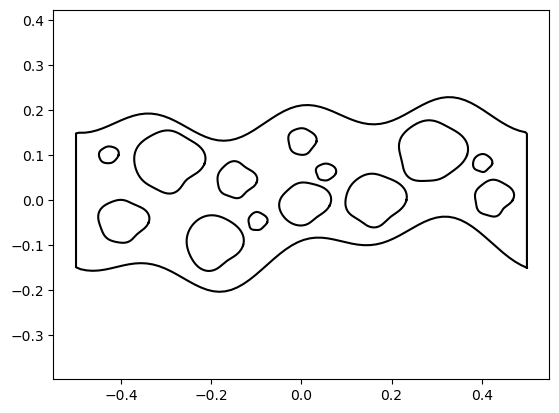

In [228]:
def pipe(t):
    h = 0.3
    d = 0.03
    def pipe_right(t):
        return (0.5, -h/2 + h*(t)/(np.pi/2))
    
    def pipe_left(t):
        return (-0.5, -h/2 + h*(np.pi*3/2-t)/(np.pi/2))
    
    def pipe_top(t):
        return (-0.5+(np.pi-t)/(np.pi/2), h/2 - d*(jnp.cos(12*t)*1.0-jnp.sin(4*t)*0.7-1))
    
    def pipe_bottom(t):
        return ((t - 3/2*np.pi)/(np.pi/2)-0.5, -h/2 - d*(jnp.cos(12*t)*1.0+jnp.sin(4*t)*2.-1))
    
    return lax.cond(t < np.pi, \
                   lambda t: lax.cond(t < np.pi/2, pipe_right, pipe_top, t),\
                   lambda t: lax.cond(t < 3*np.pi/2, pipe_left, pipe_bottom, t), t)

t = np.linspace(0, 2*np.pi, 300)
(xt, yt) = vmap(pipe)(t)

plt.plot(xt, yt, c="black")
plt.axis("equal")

xc_list = [-0.43, -0.4, -0.30, -0.2, -0.15, -0.1, 0.0, 0.0, 0.05, 0.15, 0.28, 0.42, 0.4]
yc_list = [0.1,  -0.05, 0.08, -0.1, 0.04, -0.05, 0.13, -0.012, 0.06, 0.0, 0.1, -0.0, 0.08]
r_list = [0.02, 0.05, 0.07, 0.06, 0.04, 0.02, 0.03, 0.05, 0.02, 0.06, 0.07, 0.04, 0.02]
for i, (xc, yc, r) in enumerate(zip(xc_list, yc_list, r_list)):
    rt = r 
    for j in range(5):
        rt = rt + r * (np.sin((1+j)*t)*0.2/(1+j) *np.random.rand() + np.cos((1+j)*t)*0.2/(1+j) *np.random.rand())
        #*(1 + 0.005*np.sin(2*t) + 0.001*np.cos(5*t))
    plt.plot(xc + rt*np.cos(t), yc + rt*np.sin(t), c="black")
